# Queries


In [166]:
from sqlalchemy import create_engine, text
import pandas as pd

db_params = {
    "host": "localhost",
    "database": "portofolio",
    "user": "postgres",
    "password": "postgres",
    "port": "5432",
}

engine = create_engine(
    f"postgresql://{db_params['user']}:{db_params['password']}@{db_params['host']}/{db_params['database']}"
)


dataframes = {}

In [93]:
def divide(arg1, arg2):
    try:
        arg1 = float(arg1)
        arg2 = float(arg2)
        return round(arg1 / arg2 * 100, 3)
    except (ValueError, TypeError, ZeroDivisionError):
        return None

In [205]:
# death probability at the moment
query = """
    SELECT
        location,
        date,
        total_cases,
        total_deaths,
        total_deaths / total_cases * 100 AS death_chance
    FROM
        covid_deaths
    WHERE
        location = 'Serbia' AND continent IS NOT NULL
    ORDER BY
        location ASC,
        date ASC
"""

df = pd.read_sql_query(query, engine)
dataframes["death_probability"] = df
df.head(100)

,location,date,total_cases,total_deaths,death_chance
0,Serbia,2020-01-05,NaN,NaN,NaN
1,Serbia,2020-01-06,NaN,NaN,NaN
2,Serbia,2020-01-07,NaN,NaN,NaN
3,Serbia,2020-01-08,NaN,NaN,NaN
4,Serbia,2020-01-09,NaN,NaN,NaN
...,...,...,...,...,...
95,Serbia,2020-04-09,1624.0,44.0,2.709360
96,Serbia,2020-04-10,1624.0,44.0,2.709360
97,Serbia,2020-04-11,1624.0,44.0,2.709360
98,Serbia,2020-04-12,3380.0,74.0,2.189349


In [258]:
# total cases in regards to population
query = """
    SELECT
        location,
        date,
        total_cases,
        population,
        total_cases / population * 100 AS covid_rate
    FROM
        covid_deaths
    WHERE
        continent IS NOT NULL
    ORDER BY
        location ASC,
        date ASC
"""

df = pd.read_sql_query(query, engine)
dataframes["covid_rate"] = df
df.head(100)

,location,date,total_cases,population,covid_rate
0,Afghanistan,2020-01-05,0.0,41128772,0.000000
1,Afghanistan,2020-01-06,0.0,41128772,0.000000
2,Afghanistan,2020-01-07,0.0,41128772,0.000000
3,Afghanistan,2020-01-08,0.0,41128772,0.000000
4,Afghanistan,2020-01-09,0.0,41128772,0.000000
...,...,...,...,...,...
95,Afghanistan,2020-04-09,274.0,41128772,0.000666
96,Afghanistan,2020-04-10,274.0,41128772,0.000666
97,Afghanistan,2020-04-11,274.0,41128772,0.000666
98,Afghanistan,2020-04-12,521.0,41128772,0.001267


In [251]:
# countries with highest infection rate in regards to population
query = """
    SELECT
        location,
        population,
        MAX(total_cases) AS max_total_cases,
        MAX(total_cases) / population * 100 AS infection_percentage
    FROM
        covid_deaths
    WHERE continent IS NOT NULL
    GROUP BY
        location, population
    ORDER BY
        infection_percentage DESC
"""

df = pd.read_sql_query(query, engine)
dataframes["infection_percentage"] = df
df.head(30)

,location,population,max_total_cases,infection_percentage
0,Scotland,5466000,NaN,NaN
1,Wales,3170000,NaN,NaN
2,Northern Ireland,1896000,NaN,NaN
3,Macao,695180,NaN,NaN
4,England,56550000,NaN,NaN
5,Hong Kong,7488863,NaN,NaN
6,Turkmenistan,6430777,NaN,NaN
7,Taiwan,23893396,NaN,NaN
8,Western Sahara,576005,NaN,NaN
9,North Korea,26069416,NaN,NaN


In [252]:
# countries with highest infection rate in regards to population, male and female smokers
query = """
    SELECT
        location,
        population,
        MAX(cast(female_smokers as float)) AS female_smokers,
        MAX(cast(male_smokers as float)) AS male_smokers,
        MAX(total_cases) AS max_total_cases,
        MAX(total_cases) / cast(population as decimal) * 100 AS infection_percentage
    FROM
        covid_data
    WHERE continent IS NOT NULL
    GROUP BY
        location, population
    ORDER BY
        infection_percentage DESC
"""

df = pd.read_sql_query(query, engine)
dataframes["infection_percentage_mf_smokers"] = df
df.head(30)

,location,population,female_smokers,male_smokers,max_total_cases,infection_percentage
0,Scotland,5466000.0,NaN,NaN,NaN,NaN
1,Turkmenistan,6430777.0,NaN,NaN,NaN,NaN
2,Wales,3170000.0,NaN,NaN,NaN,NaN
3,North Korea,26069416.0,NaN,NaN,NaN,NaN
4,Northern Cyprus,382836.0,NaN,NaN,NaN,NaN
5,England,56550000.0,NaN,NaN,NaN,NaN
6,Hong Kong,7488863.0,NaN,NaN,NaN,NaN
7,Macao,695180.0,NaN,NaN,NaN,NaN
8,Western Sahara,576005.0,NaN,NaN,NaN,NaN
9,Taiwan,23893396.0,NaN,NaN,NaN,NaN


In [253]:
# countries with highest infection rate in regards to population, and poverty
query = """
    SELECT
        location,
        population,
        MAX(extreme_poverty) AS extreme_poverty,
        MAX(total_cases) AS max_total_cases,
        MAX(total_cases) / cast(population as decimal) * 100 AS infection_percentage
    FROM
        covid_data
    WHERE continent IS NOT NULL
    GROUP BY
        location, population
    ORDER BY
        infection_percentage DESC
"""

df = pd.read_sql_query(query, engine)
dataframes["infection_percentage_ex_poverty"] = df
df.head(30)

,location,population,extreme_poverty,max_total_cases,infection_percentage
0,Scotland,5466000.0,NaN,NaN,NaN
1,Turkmenistan,6430777.0,NaN,NaN,NaN
2,Wales,3170000.0,NaN,NaN,NaN
3,North Korea,26069416.0,NaN,NaN,NaN
4,Northern Cyprus,382836.0,NaN,NaN,NaN
5,England,56550000.0,NaN,NaN,NaN
6,Hong Kong,7488863.0,NaN,NaN,NaN
7,Macao,695180.0,NaN,NaN,NaN
8,Western Sahara,576005.0,NaN,NaN,NaN
9,Taiwan,23893396.0,NaN,NaN,NaN


In [254]:
# countries with highest death rate in regards to population
query = """
    SELECT
        location,
        population,
        MAX(total_deaths) AS max_total_deaths,
        MAX(total_deaths) / population * 100 AS death_percentage
    FROM
        covid_deaths
    WHERE continent IS NOT NULL
    GROUP BY
        location, population
    ORDER BY
        death_percentage DESC
"""

df = pd.read_sql_query(query, engine)
dataframes["death_percentage"] = df
df.head(30)

,location,population,max_total_deaths,death_percentage
0,Pitcairn,47,NaN,NaN
1,Falkland Islands,3801,NaN,NaN
2,Northern Ireland,1896000,NaN,NaN
3,England,56550000,NaN,NaN
4,Macao,695180,NaN,NaN
5,Northern Cyprus,382836,NaN,NaN
6,Taiwan,23893396,NaN,NaN
7,Scotland,5466000,NaN,NaN
8,Niue,1952,NaN,NaN
9,Vatican,808,NaN,NaN


In [240]:
# total population vs total vaccinations
query = """
    WITH PopulationVaccinated (continent, location, date, population, new_vaccinations, total_vaccinations) 
    AS
    (
        SELECT
            d.continent,
            d.location,
            d.date,
            d.population,
            v.new_vaccinations,
            SUM(v.new_vaccinations) OVER (PARTITION BY d.location ORDER BY d.date) AS total_vaccinations
        FROM
            covid_deaths as d
        LEFT JOIN
            covid_vaccinations as v
        ON
            d.location = v.location AND d.date = v.date
        WHERE
            d.continent IS NOT NULL
        ORDER BY
            location ASC,
            date ASC
    )
    SELECT *, cast(total_vaccinations as decimal) / population * 100 AS vaccination_percentage
    FROM PopulationVaccinated
"""

df = pd.read_sql_query(query, engine)
dataframes["vaccination_percentage"] = df
df.head(2000)

,continent,location,date,population,new_vaccinations,total_vaccinations,vaccination_percentage
508,Asia,Afghanistan,2021-05-27,41128772,2859.0,2859.0,0.006951
515,Asia,Afghanistan,2021-06-03,41128772,4015.0,6874.0,0.016713
753,Asia,Afghanistan,2022-01-27,41128772,6868.0,13742.0,0.033412
843,Asia,Afghanistan,2022-04-27,41128772,383.0,14125.0,0.034343
981,Asia,Afghanistan,2022-09-12,41128772,9447.0,23572.0,0.057313
...,...,...,...,...,...,...,...
17042,Oceania,Australia,2021-09-18,26177410,226429.0,24572931.0,93.870750
17043,Oceania,Australia,2021-09-19,26177410,172274.0,24745205.0,94.528851
17044,Oceania,Australia,2021-09-20,26177410,320356.0,25065561.0,95.752639
17045,Oceania,Australia,2021-09-21,26177410,331055.0,25396616.0,97.017299


In [195]:
# creating a view
query = """
    DROP VIEW IF EXISTS PopulationVaccinated;
    CREATE VIEW PopulationVaccinated 
    AS
    (
        SELECT
            d.continent,
            d.location,
            d.date,
            d.population,
            v.new_vaccinations,
            SUM(v.new_vaccinations) OVER (PARTITION BY d.location ORDER BY d.date) AS total_vaccinations
        FROM
            covid_deaths as d
        LEFT JOIN
            covid_vaccinations as v
        ON
            d.location = v.location AND d.date = v.date
        WHERE
            d.continent IS NOT NULL
        ORDER BY
            location ASC,
            date ASC
    )
"""

with engine.connect() as conn:
    conn.execute(text(query))
    conn.commit()

In [212]:
# continent data
query = """
    SELECT
        location,
        MAX(total_deaths) AS max_total_deaths
    FROM
        covid_deaths
    WHERE continent IS NULL
    GROUP BY
        location
    ORDER BY
        max_total_deaths DESC
"""
df = pd.read_sql_query(query, engine)
dataframes["continent_total_death_count"] = df
df.head(30)

,location,max_total_deaths
0,World,7026534.0
1,High income,2966430.0
2,Upper middle income,2666859.0
3,Europe,2096853.0
4,North America,1647919.0
5,Asia,1636508.0
6,South America,1354440.0
7,Lower middle income,1341253.0
8,European Union,1258724.0
9,Africa,259079.0


In [259]:
# world data by date
query = """
   SELECT
        date, 
		SUM(new_cases) AS total_new_cases,
		SUM(SUM(new_cases)) OVER (ORDER BY date ASC) AS world_total_cases
    FROM
        covid_deaths
    WHERE continent IS NOT NULL
	GROUP BY
		date
    ORDER BY
        date ASC
"""

df = pd.read_sql_query(query, engine)
dataframes["world_total_cases_by_date"] = df
df.head(20)

,date,total_new_cases,world_total_cases
0,2020-01-01,NaN,NaN
1,2020-01-02,NaN,NaN
2,2020-01-03,NaN,NaN
3,2020-01-04,NaN,NaN
4,2020-01-05,2.0,2.0
5,2020-01-06,0.0,2.0
6,2020-01-07,0.0,2.0
7,2020-01-08,0.0,2.0
8,2020-01-09,0.0,2.0
9,2020-01-10,0.0,2.0


In [220]:
# world data
query = """
    SELECT
        SUM(new_cases) AS total_cases,
        SUM(new_deaths) AS total_deaths,
        SUM(new_deaths) / SUM(cast(new_cases as numeric)) * 100 AS death_chance
    FROM
        covid_deaths
    WHERE continent IS NOT NULL
"""

df = pd.read_sql_query(query, engine)
dataframes["world_total_cases"] = df
df.head(30)

,total_cases,total_deaths,death_chance
0,774561579,6986838,0.902038


In [228]:
print(dataframes.keys())
import os

if not os.path.exists("csvs/generated"):
    os.makedirs("csvs/generated")
    for key in dataframes.keys():
        dataframes[key].fillna(0, inplace=True)
        dataframes[key].to_excel(f"csvs/generated/{key}.xlsx", index=False)

dict_keys(['world_total_cases_by_date', 'world_total_cases', 'death_probability', 'covid_rate', 'infection_percentage', 'infection_percentage_mf_smokers', 'infection_percentage_ex_poverty', 'death_percentage', 'vaccination_percentage', 'continent_total_death_count'])


# Data correlation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
plt.style.use('ggplot')
%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [7]:
df = pd.read_csv("csvs/original/covid_data_filtered.csv", low_memory=False)
df.head(2)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,hosp_patients,total_tests,new_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality
0,AFG,Asia,Afghanistan,05-01-20,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN
1,AFG,Asia,Afghanistan,06-01-20,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN


In [14]:
# data cleaning
df_cleaned = df.copy()
df_cleaned.drop_duplicates(inplace=True)
for col in df.columns:
    percent_missing = df[col].isnull().mean()
    if percent_missing > 0:
        df_cleaned[col] = df[col].fillna(0, inplace=False)
    print(f"{col} - {percent_missing :.1%}")
df_cleaned["population"] = df_cleaned["population"].astype("int64")
df_cleaned["total_cases"] = df_cleaned["total_cases"].astype("int64")
df_cleaned["total_deaths"] = df_cleaned["total_deaths"].astype("int64")
df_cleaned["date"] = pd.to_datetime(df_cleaned["date"])

iso_code - 4.8%
continent - 4.8%
location - 4.8%
date - 4.8%
total_cases - 15.0%
new_cases - 7.6%
total_deaths - 20.8%
new_deaths - 7.6%
reproduction_rate - 51.3%
hosp_patients - 89.4%
total_tests - 78.9%
new_tests - 80.0%
positive_rate - 74.6%
total_vaccinations - 81.7%
people_vaccinated - 82.8%
people_fully_vaccinated - 83.5%
total_boosters - 89.8%
new_vaccinations - 85.4%
stringency_index - 47.7%
population_density - 15.4%
median_age - 21.4%
aged_65_older - 24.1%
aged_70_older - 22.2%
gdp_per_capita - 22.9%
extreme_poverty - 50.5%
cardiovasc_death_rate - 22.8%
diabetes_prevalence - 18.8%
female_smokers - 42.1%
male_smokers - 42.9%
handwashing_facilities - 62.4%
hospital_beds_per_thousand - 31.9%
life_expectancy - 8.3%
human_development_index - 25.1%
population - 4.8%
excess_mortality - 96.5%


C:\Users\masac\AppData\Local\Temp\ipykernel_1632\2774831794.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned["date"] = pd.to_datetime(df_cleaned["date"])


In [55]:
country_data = pd.pivot_table(
    df_cleaned,
    index="location",
    values=["total_cases", "total_deaths", "population"],
    aggfunc="max",
)
country_data = country_data.reset_index()
country_data = country_data.iloc[1:]

country_data["recovered_cases"] = country_data["total_cases"] - country_data["total_deaths"]
country_data["death_rate"] = (
    country_data["total_deaths"] / country_data["total_cases"] * 100
)
country_data["recovery_rate"] = (
    country_data["recovered_cases"] / country_data["total_cases"] * 100
)

country_data = country_data.sort_values("death_rate", ascending=False)
#country_data.style.background_gradient(cmap="plasma")

# Diagrams

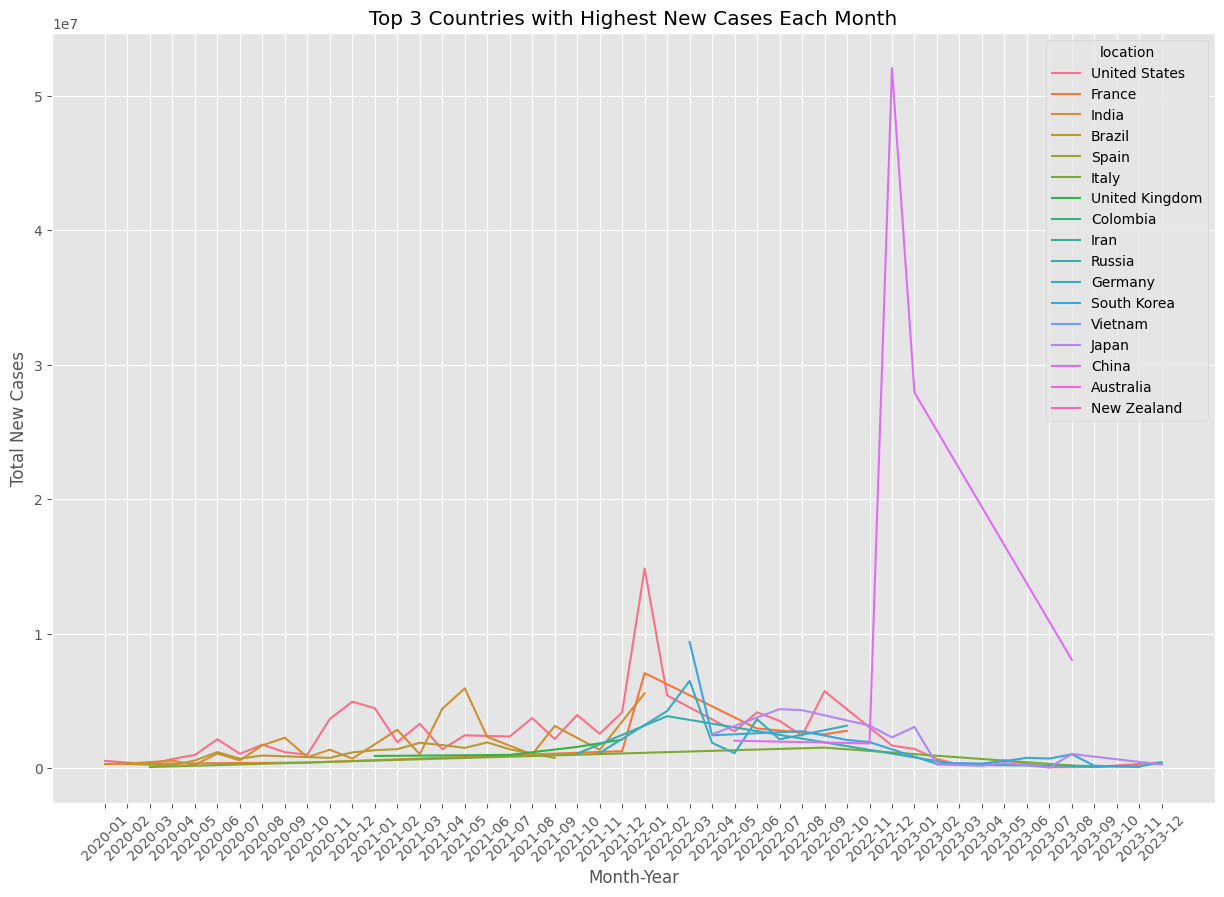

In [56]:
# top 3 countries with most new cases for each month
df_date_analysis = df_cleaned.copy()
df_date_analysis["month"] = df_date_analysis["date"].dt.month
df_date_analysis["year"] = df_date_analysis["date"].dt.year
df_date_analysis["month_year"] = df_date_analysis["date"].dt.to_period("M")
df_date_analysis["month_year"] = df_date_analysis["month_year"].astype(str)

top_3_countries = df_date_analysis.groupby(["month_year", "location"]).agg(
    {"new_cases": "sum"}
)
top_3_countries = top_3_countries.reset_index()
top_3_countries = top_3_countries.sort_values(
    ["month_year", "new_cases"], ascending=[True, False]
)
top_3_countries = top_3_countries.groupby("month_year").head(3)
top_3_countries = top_3_countries[top_3_countries['month_year'].str.startswith('1970') == False]
top_3_countries = top_3_countries[top_3_countries['month_year'].str.startswith('2024') == False]

plt.figure(figsize=(15, 10))
ax = sns.lineplot(x="month_year", y="new_cases", hue="location", data=top_3_countries)
plt.title('Top 3 Countries with Highest New Cases Each Month')
plt.xlabel('Month-Year')
plt.ylabel('Total New Cases')
plt.xticks(rotation=45)
plt.show()


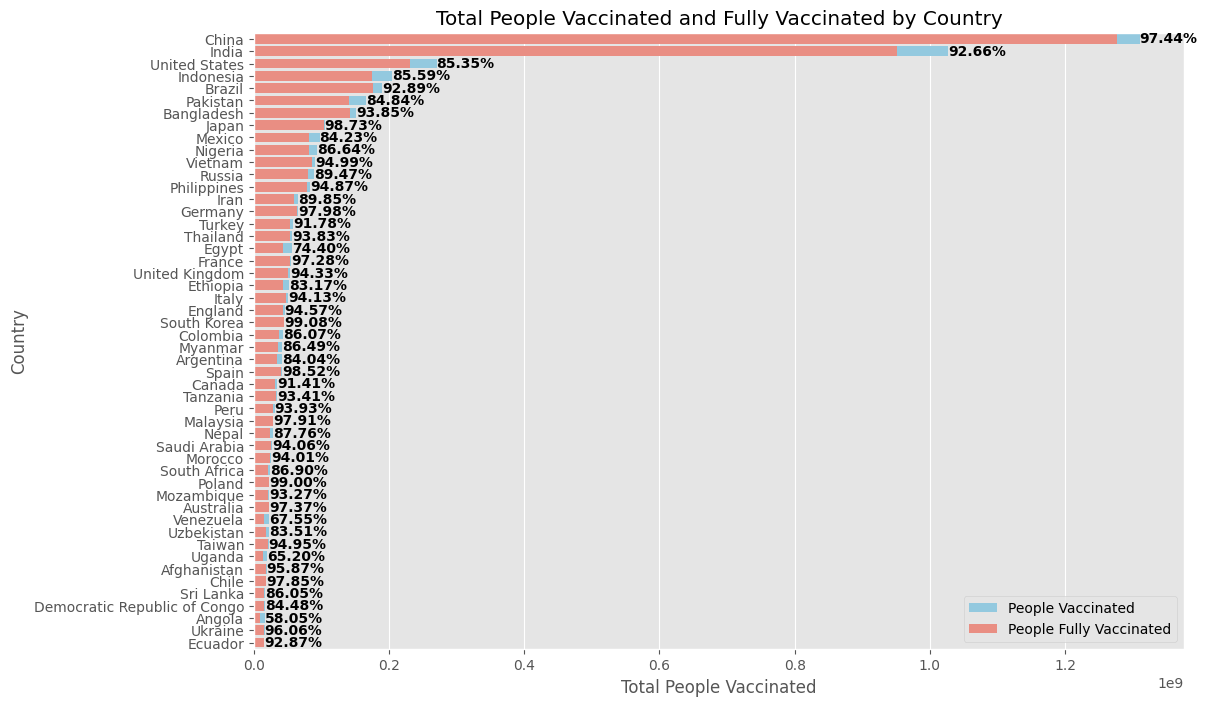

In [52]:
# percent of people vaccinated vs people fully vaccinated
total_people_vaccinated_by_country = df_cleaned.groupby("location").agg(
    {"people_vaccinated": "max", "people_fully_vaccinated": "max"}
)
total_people_vaccinated_by_country = total_people_vaccinated_by_country.reset_index()
total_people_vaccinated_by_country = total_people_vaccinated_by_country.iloc[1:]
total_people_vaccinated_by_country = total_people_vaccinated_by_country.sort_values(
    "people_vaccinated", ascending=False
)
total_people_vaccinated_by_country = total_people_vaccinated_by_country.head(50)

plt.figure(figsize=(12, 8))
bar1 = sns.barplot(
    x="people_vaccinated",
    y="location",
    data=total_people_vaccinated_by_country,
    label="People Vaccinated",
    color="skyblue",
)

bar2 = sns.barplot(
    x="people_fully_vaccinated",
    y="location",
    data=total_people_vaccinated_by_country,
    label="People Fully Vaccinated",
    color="salmon",
)

# Add labels and legend
plt.xlabel("Total People Vaccinated")
plt.ylabel("Country")
plt.title("Total People Vaccinated and Fully Vaccinated by Country")
plt.legend()

for idx, p1 in enumerate(bar1.patches):
    if idx > 49:
        break
    total_vaccinated = p1.get_width()
    fully_vaccinated = bar1.patches[idx + 50].get_width()
    percentage = (fully_vaccinated / total_vaccinated) * 100

    plt.text(
        total_vaccinated,
        idx,
        f"{percentage:.2f}%",
        ha="left",
        va="center",
        color="black",
        fontweight="bold",
    )


plt.show()

# Death Rate Plots

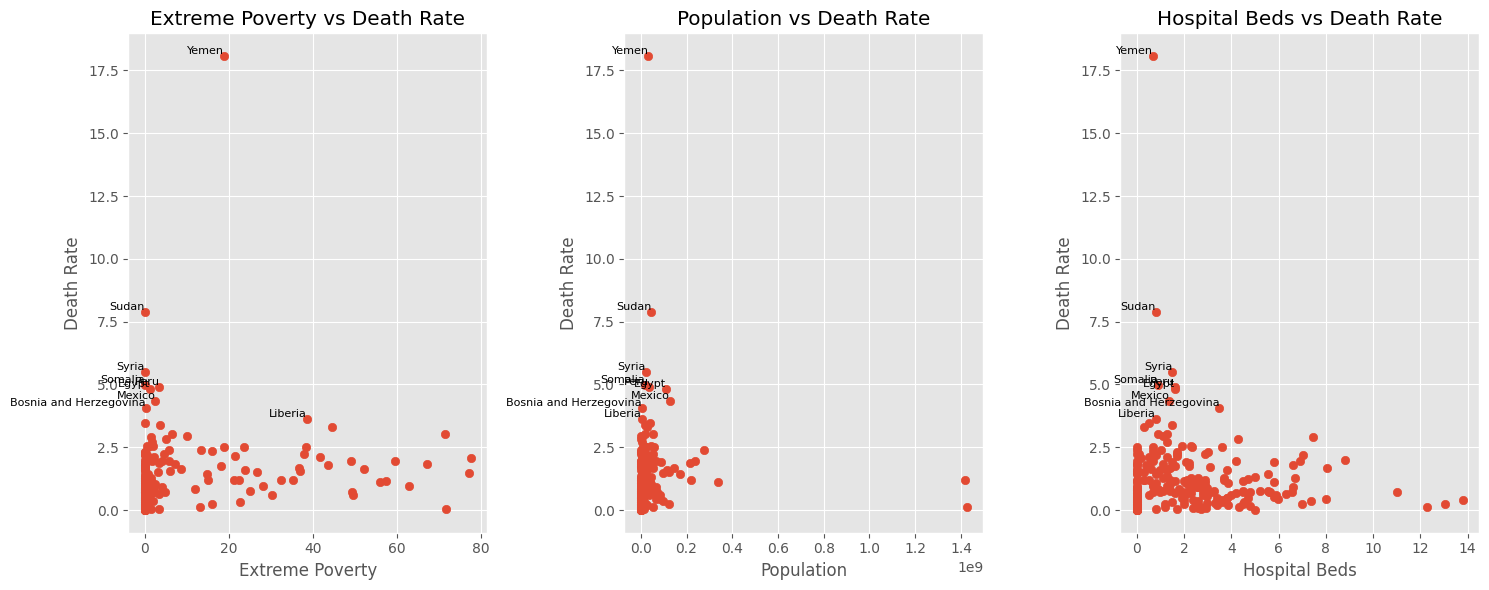

In [6]:
# correlation to death rate in a country

# extreme poverty
grouped_data_poverty = (
    df_cleaned.groupby("location")
    .agg(
        extreme_poverty=("extreme_poverty", "mean"),
        total_deaths=("total_deaths", "max"),
        total_cases=("total_cases", "max"),
    )
    .assign(death_rate=lambda x: x["total_deaths"] / x["total_cases"] * 100)
    .drop(columns=["total_deaths", "total_cases"])
)
# population
grouped_data_population = (
    df_cleaned.groupby("location")
    .agg(
        population=("population", "max"),
        total_deaths=("total_deaths", "max"),
        total_cases=("total_cases", "max"),
    )
    .assign(death_rate=lambda x: x["total_deaths"] / x["total_cases"] * 100)
    .drop(columns=["total_deaths", "total_cases"])
)
# hospital_beds_per_thousand
grouped_data_hospital_beds = (
    df_cleaned.groupby("location")
    .agg(
        hospital_beds_per_thousand=("hospital_beds_per_thousand", "mean"),
        total_deaths=("total_deaths", "max"),
        total_cases=("total_cases", "max"),
    )
    .assign(death_rate=lambda x: x["total_deaths"] / x["total_cases"] * 100)
    .drop(columns=["total_deaths", "total_cases"])
)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

axes[0].scatter(
    x=grouped_data_poverty["extreme_poverty"], y=grouped_data_poverty["death_rate"]
)

for location, (x, y) in grouped_data_poverty.iterrows():
    if y > grouped_data_poverty["death_rate"].max() * 0.2:
        axes[0].text(x, y, location, fontsize=8, ha="right", va="bottom")

axes[0].set_title("Extreme Poverty vs Death Rate")
axes[0].set_xlabel("Extreme Poverty")
axes[0].set_ylabel("Death Rate")

axes[1].scatter(
    x=grouped_data_population["population"], y=grouped_data_population["death_rate"]
)

for location, (x, y) in grouped_data_population.iterrows():
    if y > grouped_data_population["death_rate"].max() * 0.2:
        axes[1].text(x, y, location, fontsize=8, ha="right", va="bottom")

axes[1].set_title("Population vs Death Rate")
axes[1].set_xlabel("Population")
axes[1].set_ylabel("Death Rate")

axes[2].scatter(
    x=grouped_data_hospital_beds["hospital_beds_per_thousand"],
    y=grouped_data_hospital_beds["death_rate"],
)

for location, (x, y) in grouped_data_hospital_beds.iterrows():
    if y > grouped_data_hospital_beds["death_rate"].max() * 0.2:
        axes[2].text(x, y, location, fontsize=8, ha="right", va="bottom")

axes[2].set_title("Hospital Beds vs Death Rate")
axes[2].set_xlabel("Hospital Beds")
axes[2].set_ylabel("Death Rate")

plt.tight_layout()
plt.show()

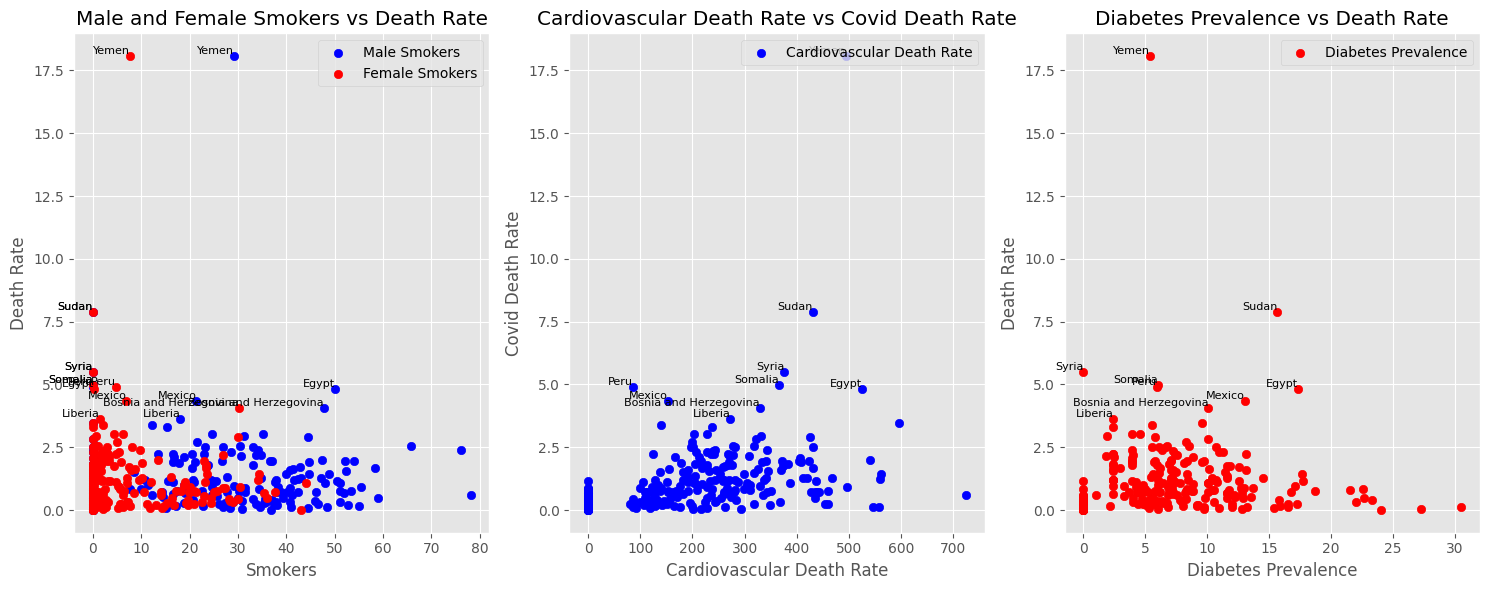

In [7]:
# correlation to death rate in a country

# female_smokers
# male_smokers
grouped_data_smokers = (
    df_cleaned.groupby("location")
    .agg(
        female_smokers=("female_smokers", "mean"),
        male_smokers=("male_smokers", "mean"),
        total_deaths=("total_deaths", "max"),
        total_cases=("total_cases", "max"),
    )
    .assign(death_rate=lambda x: x["total_deaths"] / x["total_cases"] * 100)
    .drop(columns=["total_deaths", "total_cases"])
)

# cardiovasc_death_rate
# diabetes_prevalence
grouped_data_health = (
    df_cleaned.groupby("location")
    .agg(
        cardiovasc_death_rate=("cardiovasc_death_rate", "mean"),
        diabetes_prevalence=("diabetes_prevalence", "mean"),
        total_deaths=("total_deaths", "max"),
        total_cases=("total_cases", "max"),
    )
    .assign(death_rate=lambda x: x["total_deaths"] / x["total_cases"] * 100)
    .drop(columns=["total_deaths", "total_cases"])
)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

axes[0].scatter(
    x=grouped_data_smokers["male_smokers"],
    y=grouped_data_smokers["death_rate"],
    color="blue",
    label="Male Smokers",
)
axes[0].scatter(
    x=grouped_data_smokers["female_smokers"],
    y=grouped_data_smokers["death_rate"],
    color="red",
    label="Female Smokers",
)

for location, (x, y, z) in grouped_data_smokers.iterrows():
    if z > grouped_data_smokers["death_rate"].max() * 0.2:
        axes[0].text(x, z, location, fontsize=8, ha="right", va="bottom")
        axes[0].text(y, z, location, fontsize=8, ha="right", va="bottom")

axes[0].set_title("Male and Female Smokers vs Death Rate")
axes[0].set_xlabel("Smokers")
axes[0].set_ylabel("Death Rate")
axes[0].legend(loc="upper right")

axes[1].scatter(
    x=grouped_data_health["cardiovasc_death_rate"],
    y=grouped_data_health["death_rate"],
    color="blue",
    label="Cardiovascular Death Rate",
)

axes[2].scatter(
    x=grouped_data_health["diabetes_prevalence"],
    y=grouped_data_health["death_rate"],
    color="red",
    label="Diabetes Prevalence",
)

for location, (x, y, z) in grouped_data_health.iterrows():
    if z > grouped_data_health["death_rate"].max() * 0.2:
        axes[1].text(x, z, location, fontsize=8, ha="right", va="bottom")
        axes[2].text(y, z, location, fontsize=8, ha="right", va="bottom")

axes[1].set_title("Cardiovascular Death Rate vs Covid Death Rate")
axes[1].set_xlabel("Cardiovascular Death Rate")
axes[1].set_ylabel("Covid Death Rate")
axes[1].legend(loc="upper right")

axes[2].set_title("Diabetes Prevalence vs Death Rate")
axes[2].set_xlabel("Diabetes Prevalence")
axes[2].set_ylabel("Death Rate")
axes[2].legend(loc="upper right")

plt.tight_layout()
plt.show()

# Recovery Rate Plots

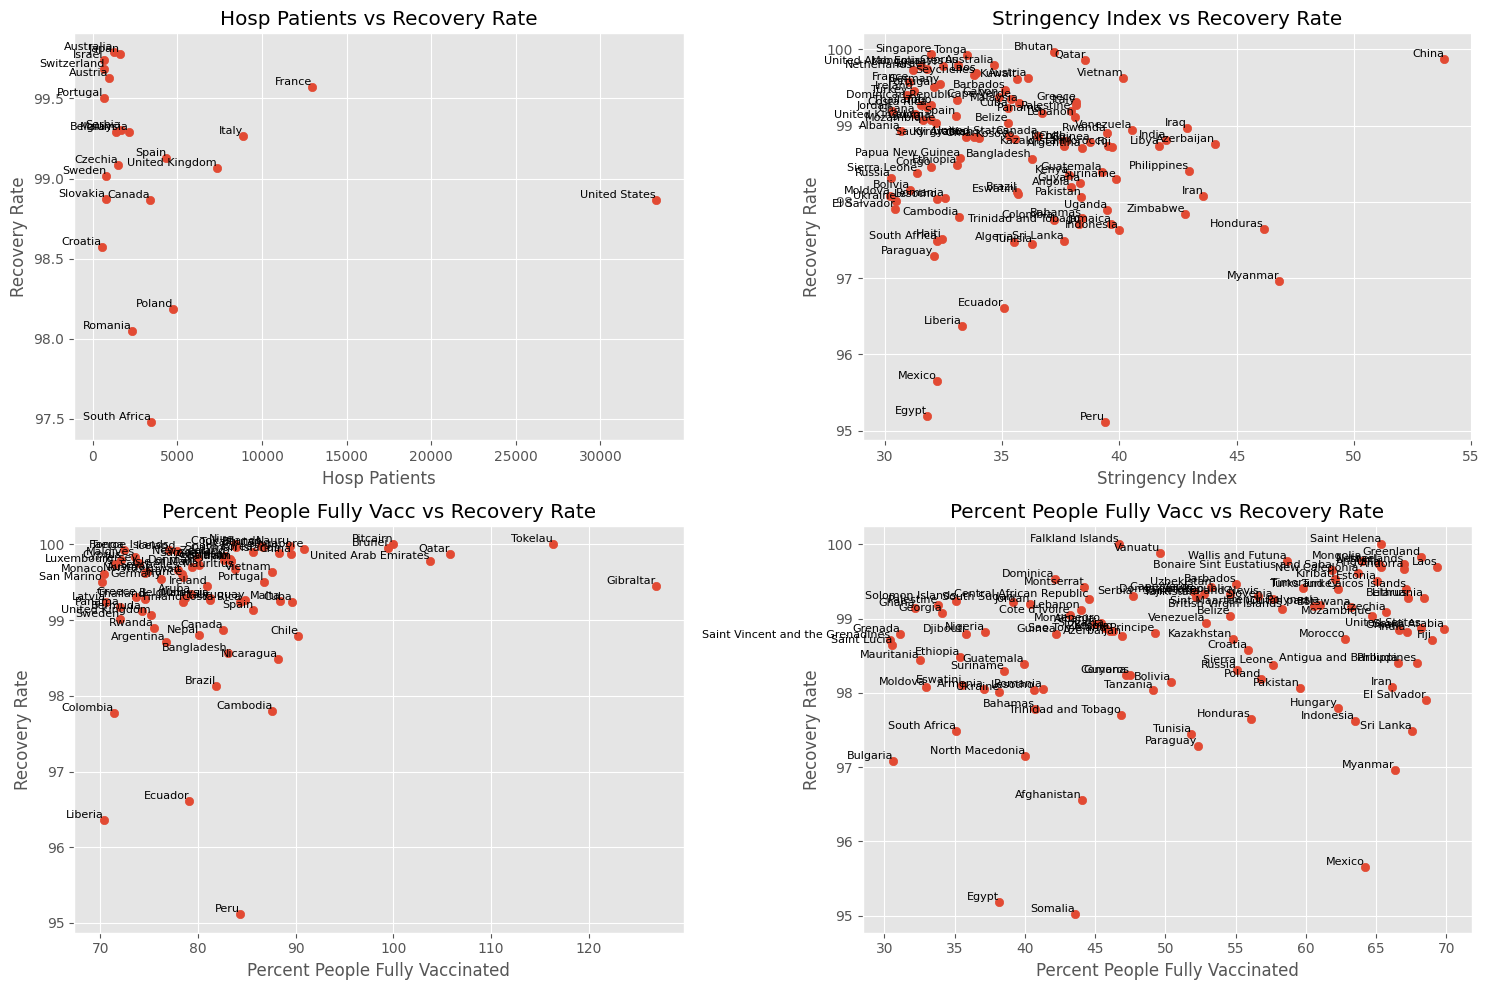

In [8]:
# correlation to recovery rate in a country

# hospitalized patients
grouped_data_hosp_patients = (
    df_cleaned.groupby("location")
    .agg(
        hosp_patients=("hosp_patients", "mean"),
        total_deaths=("total_deaths", "max"),
        total_cases=("total_cases", "max"),
    )
    .assign(
        recovery_rate=lambda x: (x["total_cases"] - x["total_deaths"])
        / x["total_cases"]
        * 100
    )
    .drop(columns=["total_deaths", "total_cases"])
)
grouped_data_hosp_patients = grouped_data_hosp_patients[
    grouped_data_hosp_patients["hosp_patients"] > 500
]

# people fully vaccinated
grouped_data_people_fully_vaccinated = (
    df_cleaned.groupby("location")
    .agg(
        people_fully_vaccinated=("people_fully_vaccinated", "max"),
        total_deaths=("total_deaths", "max"),
        total_cases=("total_cases", "max"),
        population=("population", "max"),
    )
    .assign(
        vaccination_percent=lambda x: x["people_fully_vaccinated"]
        / x["population"]
        * 100,
        recovery_rate=lambda x: (x["total_cases"] - x["total_deaths"])
        / x["total_cases"]
        * 100,
    )
    .drop(
        columns=["total_deaths", "total_cases", "population", "people_fully_vaccinated"]
    )
)
grouped_data_people_fully_vaccinated1 = grouped_data_people_fully_vaccinated[
    grouped_data_people_fully_vaccinated["vaccination_percent"] > 70
]
grouped_data_people_fully_vaccinated1 = grouped_data_people_fully_vaccinated1.dropna()

grouped_data_people_fully_vaccinated2 = grouped_data_people_fully_vaccinated[
    grouped_data_people_fully_vaccinated["vaccination_percent"] <= 70
]
grouped_data_people_fully_vaccinated2 = grouped_data_people_fully_vaccinated2[
    grouped_data_people_fully_vaccinated2["vaccination_percent"] > 30
]

# stringency index
grouped_data_stringency_index = (
    df_cleaned.groupby("location")
    .agg(
        stringency_index=("stringency_index", "mean"),
        total_deaths=("total_deaths", "max"),
        total_cases=("total_cases", "max"),
    )
    .assign(
        recovery_rate=lambda x: (x["total_cases"] - x["total_deaths"])
        / x["total_cases"]
        * 100
    )
    .drop(columns=["total_deaths", "total_cases"])
)
grouped_data_stringency_index = grouped_data_stringency_index[
    grouped_data_stringency_index["stringency_index"] > 30
]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes[0][0].scatter(
    x=grouped_data_hosp_patients["hosp_patients"],
    y=grouped_data_hosp_patients["recovery_rate"],
)

for location, (x, y) in grouped_data_hosp_patients.iterrows():
    if y > grouped_data_hosp_patients["recovery_rate"].max() * 0.9:
        axes[0][0].text(x, y, location, fontsize=8, ha="right", va="bottom")

axes[0][0].set_title("Hosp Patients vs Recovery Rate")
axes[0][0].set_xlabel("Hosp Patients")
axes[0][0].set_ylabel("Recovery Rate")

axes[0][1].scatter(
    x=grouped_data_stringency_index["stringency_index"],
    y=grouped_data_stringency_index["recovery_rate"],
)

for location, (x, y) in grouped_data_stringency_index.iterrows():
    if y > grouped_data_stringency_index["recovery_rate"].max() * 0.9:
        axes[0][1].text(x, y, location, fontsize=8, ha="right", va="bottom")

axes[0][1].set_title("Stringency Index vs Recovery Rate")
axes[0][1].set_xlabel("Stringency Index")
axes[0][1].set_ylabel("Recovery Rate")

axes[1][0].scatter(
    x=grouped_data_people_fully_vaccinated1["vaccination_percent"],
    y=grouped_data_people_fully_vaccinated1["recovery_rate"],
)

for location, (x, y) in grouped_data_people_fully_vaccinated1.iterrows():
    axes[1][0].text(x, y, location, fontsize=8, ha="right", va="bottom")

axes[1][0].set_title("Percent People Fully Vacc vs Recovery Rate")
axes[1][0].set_xlabel("Percent People Fully Vaccinated")
axes[1][0].set_ylabel("Recovery Rate")

axes[1][1].scatter(
    x=grouped_data_people_fully_vaccinated2["vaccination_percent"],
    y=grouped_data_people_fully_vaccinated2["recovery_rate"],
)

for location, (x, y) in grouped_data_people_fully_vaccinated2.iterrows():
    axes[1][1].text(x, y, location, fontsize=8, ha="right", va="bottom")

axes[1][1].set_title("Percent People Fully Vacc vs Recovery Rate")
axes[1][1].set_xlabel("Percent People Fully Vaccinated")
axes[1][1].set_ylabel("Recovery Rate")

plt.tight_layout()
plt.show()